In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from pyts.preprocessing import InterpolationImputer

## ZORI

In [2]:
zori = pd.read_csv('./data/cleandata/clean_zori.csv').drop('Unnamed: 0', axis = 1)

In [3]:
print(f"Data contains {pd.unique(zori['ZipCode']).shape[0]} unique zipcodes.")
print(f"Data contains {pd.unique(zori['County'] + ', ' + zori['State']).shape[0]} unique counties.")

Data contains 3264 unique zipcodes.
Data contains 313 unique counties.


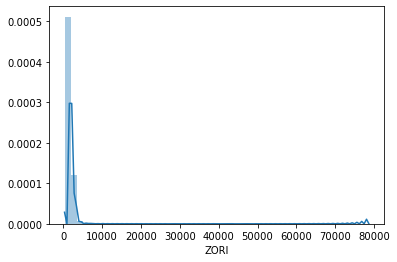

In [4]:
sns.distplot(zori['ZORI']); #Skewed right, i.e., a lot of outliers

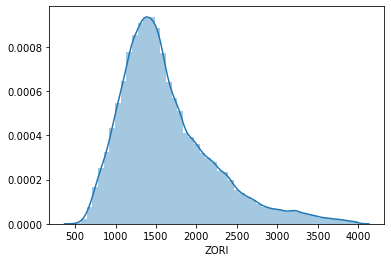

In [5]:
sns.distplot(zori[zori['ZORI'] <= 4000]['ZORI']);

In [6]:
print(f"Out of {zori.shape[0]} ZORI rows, {zori[zori['ZORI'] <= 4000].shape[0]} were less than $4,000.")

Out of 261120 ZORI rows, 247054 were less than $4,000.


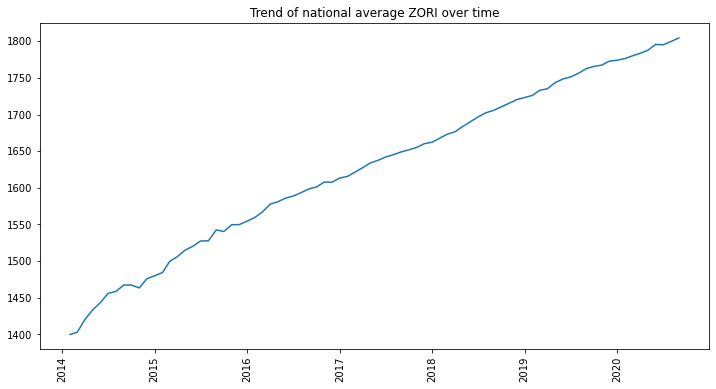

In [7]:
temp = zori[zori['ZORI'] <= 4000].groupby(['Year', 'Month']).mean()['ZORI'].reset_index()
temp['Year_Month'] = temp['Year'].map(str) + '_' + temp['Month'].map(str)
temp['Year_Month'] = pd.to_datetime(temp['Year_Month'], format = '%Y_%m')
temp = temp[['Year_Month', 'ZORI']]
plt.figure(figsize = (12, 6))
plt.plot(temp['Year_Month'], temp['ZORI'])
plt.xticks(rotation = 90)
plt.title('Trend of national average ZORI over time');

## HPI

In [8]:
hpi = pd.read_csv('./data/cleandata/clean_hpi.csv').drop('Unnamed: 0', axis = 1)

In [9]:
print(f"Data contains {pd.unique(hpi['ZipCode']).shape[0]} unique zipcodes.")

Data contains 14624 unique zipcodes.


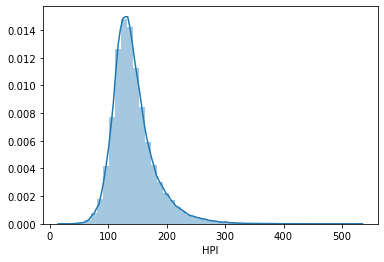

In [10]:
sns.distplot(hpi['HPI']); 

In [11]:
temp = pd.read_excel('./data/HPI_AT_BDL_ZIP5.xlsx', skiprows = 6)
temp = temp[temp['Year'] >= 2000]
temp = temp[['Five-Digit ZIP Code', 'Year', 'HPI with 2000 base']]
temp.columns = ['ZipCode', 'Year', 'HPI']
temp = temp[temp['HPI'] != '.']
temp['HPI'] = temp['HPI'].map(float)
temp = temp[temp['ZipCode'].isin(temp.groupby('ZipCode').count()['HPI'][temp.groupby('ZipCode').count()['HPI'] >= 15].index)]

In [12]:
temp2 = pd.DataFrame({'ZipCode': pd.unique(temp['ZipCode']).repeat(20), 
                      'Year': list(np.arange(2000, temp['Year'].max() + 1)) * len(pd.unique(temp['ZipCode']))})

In [13]:
temp = pd.merge(temp2, temp, on = ['ZipCode', 'Year'], how = 'left')

In [14]:
for zipcode, df in temp.groupby('ZipCode'):
    if df['HPI'].isnull().sum() == 0:
        continue
    else:
        imputer = InterpolationImputer()
        df['HPI'] = imputer.transform([list(df[['HPI']].reset_index()['index']), 
                                       list(df[['HPI']].reset_index()['HPI'])])[1]
        temp.loc[temp['ZipCode'] == zipcode, 'HPI'] = df['HPI']

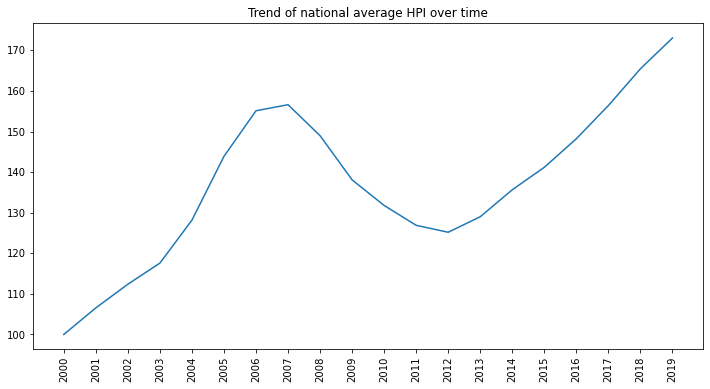

In [15]:
temp = temp.groupby('Year').mean()['HPI'].reset_index()
plt.figure(figsize = (12, 6))
plt.plot(temp['Year'], temp['HPI'])
plt.xticks(ticks = range(2000, 2020), rotation = 90)
plt.title('Trend of national average HPI over time');

## ZHVI

In [32]:
zhvi = pd.read_csv('./data/cleandata/clean_zhvi.csv').drop('Unnamed: 0', axis = 1)
zhvi = zhvi[zhvi['Year'] >= 2000]

In [33]:
print(f"Data contains {pd.unique(zhvi['ZipCode']).shape[0]} unique zipcodes.")
print(f"Data contains {pd.unique(zhvi['County'] + ', ' + zhvi['State']).shape[0]} unique counties.")

Data contains 18274 unique zipcodes.
Data contains 1872 unique counties.


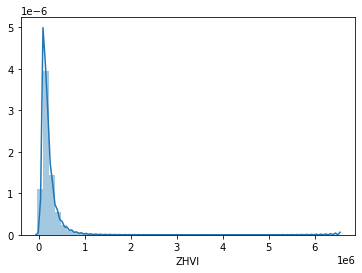

In [34]:
sns.distplot(zhvi['ZHVI']); #Skewed right, i.e., a lot of outliers

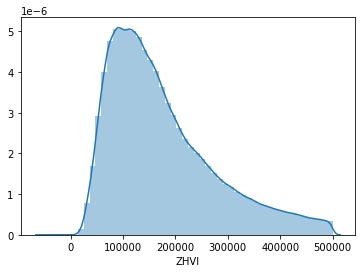

In [35]:
sns.distplot(zhvi[zhvi['ZHVI'] <= 0.5e6]['ZHVI']);

In [37]:
print(f"Out of {zhvi.shape[0]} ZHVI rows, {zhvi[zhvi['ZHVI'] <= 0.5e6].shape[0]} were less than $500,000.")

Out of 4568500 ZHVI rows, 4282567 were less than $500,000.


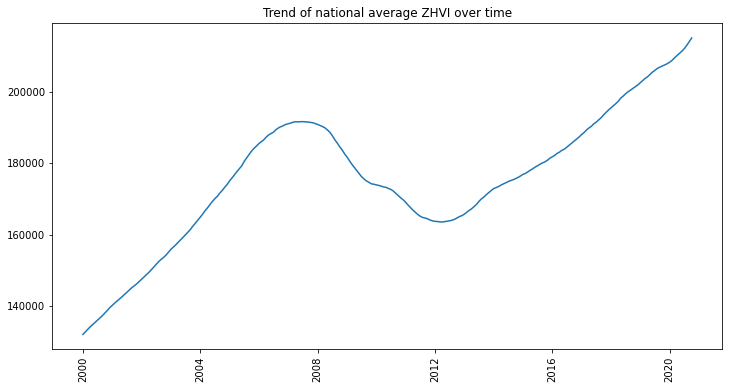

In [38]:
temp = zhvi[zhvi['ZHVI'] <= 0.5e6].groupby(['Year', 'Month']).mean()['ZHVI'].reset_index()
temp['Year_Month'] = temp['Year'].map(str) + '_' + temp['Month'].map(str)
temp['Year_Month'] = pd.to_datetime(temp['Year_Month'], format = '%Y_%m')
temp = temp[['Year_Month', 'ZHVI']]
plt.figure(figsize = (12, 6))
plt.plot(temp['Year_Month'], temp['ZHVI'])
plt.xticks(rotation = 90)
plt.title('Trend of national average ZHVI over time');

## Air Quality

In [42]:
airq = pd.read_csv('./data/cleandata/clean_airq.csv').drop('Unnamed: 0', axis = 1)

In [43]:
print(f"Data contains {pd.unique(airq['County'] + ', ' + airq['State']).shape[0]} unique counties.")

Data contains 882 unique counties.


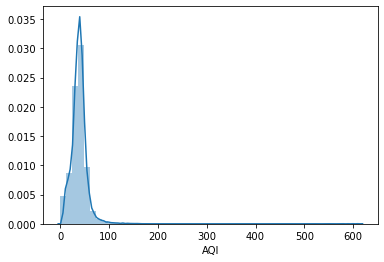

In [44]:
sns.distplot(airq['AQI']); #Skewed right, i.e., a lot of outliers

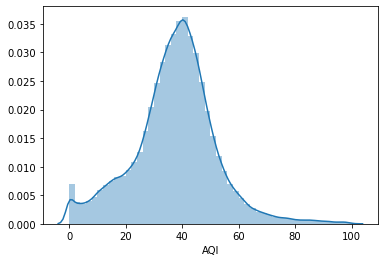

In [45]:
sns.distplot(airq[airq['AQI'] <= 100]['AQI']);

In [46]:
print(f"Out of {airq.shape[0]} AQI rows, {airq[airq['AQI'] <= 100].shape[0]} were less than 100.")

Out of 84540 AQI rows, 83962 were less than 100.


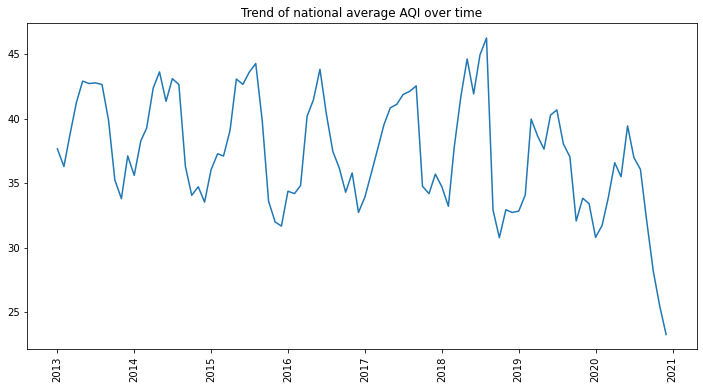

In [47]:
temp = airq[airq['AQI'] <= 100].groupby(['Year', 'Month']).mean()['AQI'].reset_index()
temp['Year_Month'] = temp['Year'].map(str) + '_' + temp['Month'].map(str)
temp['Year_Month'] = pd.to_datetime(temp['Year_Month'], format = '%Y_%m')
temp = temp[['Year_Month', 'AQI']]
plt.figure(figsize = (12, 6))
plt.plot(temp['Year_Month'], temp['AQI'])
plt.xticks(rotation = 90)
plt.title('Trend of national average AQI over time');

## Population

In [48]:
population = pd.read_csv('./data/cleandata/clean_population.csv').drop('Unnamed: 0', axis = 1)

In [49]:
print(f"Data contains {pd.unique(population['County'] + ', ' + population['State']).shape[0]} unique counties.")

Data contains 843 unique counties.


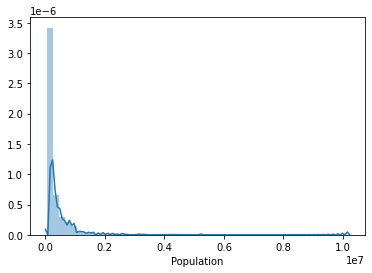

In [50]:
sns.distplot(population['Population']); #Skewed right, i.e., a lot of outliers

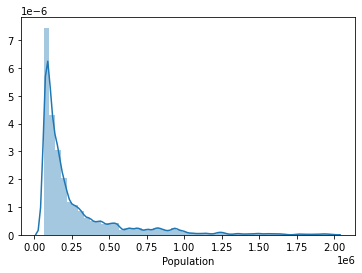

In [51]:
sns.distplot(population[population['Population'] <= 0.2e7]['Population']);

In [52]:
print(f"Out of {population.shape[0]} population rows, {population[population['Population'] <= 0.2e7].shape[0]}\
 were less than 200,000.")

Out of 89748 population rows, 88200 were less than 200,000.


In [57]:
population.drop('Month', axis = 1).drop('Year_Month', axis = 1).drop_duplicates()

,County,Population,State,Year
0,Montgomery,471734,TX,2011
12,Nacogdoches,65466,TX,2011
24,Nueces,343281,TX,2011
36,Orange,82487,TX,2011
48,Parker,118376,TX,2011
...,...,...,...,...
89688,Ponce,131881,PR,2019
89700,San Juan,318441,PR,2019
89712,Toa Alta,72025,PR,2019
89724,Toa Baja,74271,PR,2019


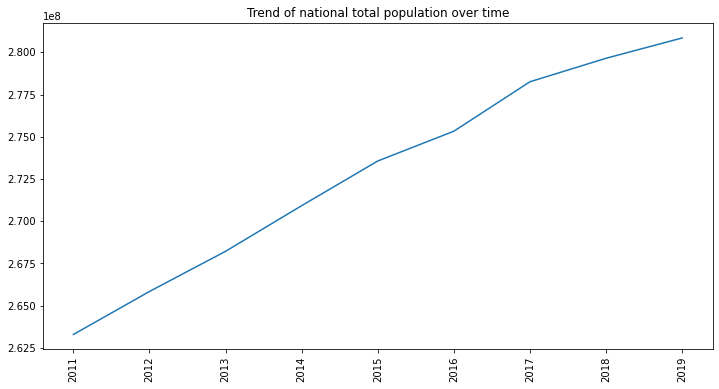

In [59]:
temp = population.drop('Month', axis = 1).drop('Year_Month', axis = 1).drop_duplicates().groupby('Year').sum()['Population'].reset_index()
plt.figure(figsize = (12, 6))
plt.plot(temp['Year'], temp['Population'])
plt.xticks(rotation = 90)
plt.title('Trend of national total population over time');

## PCE

In [60]:
pce = pd.read_csv('./data/cleandata/clean_pce.csv').drop('Unnamed: 0', axis = 1)

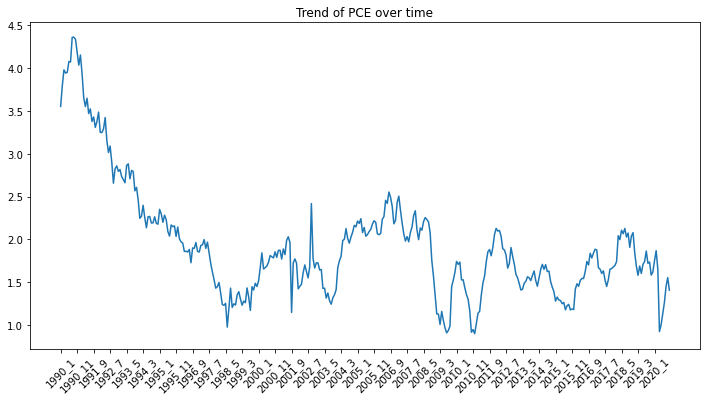

In [61]:
plt.figure(figsize = (12, 6))
plt.plot(pce['Year_Month'], pce['PCE'])
plt.xticks(ticks = [pce['Year_Month'][i] for i in pce['Year_Month'].index if i % 10 == 0], rotation = 45)
plt.title('Trend of PCE over time');

## Income and Household

In [62]:
IandH = pd.read_csv('./data/cleandata/clean_IandH.csv').drop('Unnamed: 0', axis = 1)

In [63]:
IandH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89772 entries, 0 to 89771
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              89772 non-null  int64  
 1   County            89772 non-null  object 
 2   Total_Households  89772 non-null  float64
 3   Med_income        89772 non-null  float64
 4   State             89664 non-null  object 
 5   Month             89772 non-null  int64  
 6   Year_Month        89772 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 4.8+ MB


### Distibution of median income and number of households

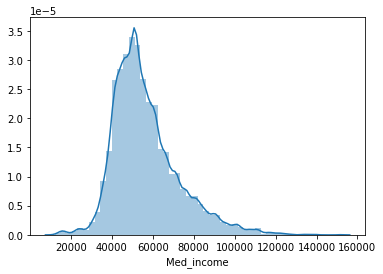

In [64]:
sns.distplot(IandH['Med_income']);

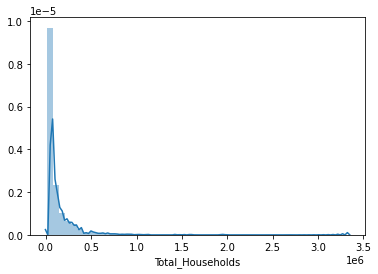

In [65]:
sns.distplot(IandH['Total_Households']);

Both features are skewed to the right indicating existing outliers that can distort data analysis and affect model performance 

### *top 10 counties with highest average household median income*

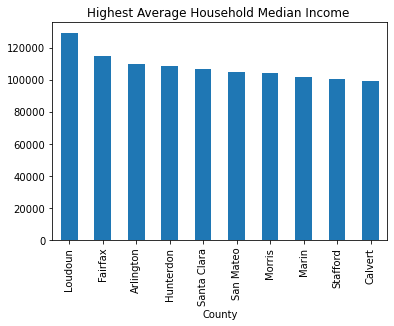

In [66]:
IandH.groupby('County')['Med_income'].mean().nlargest(10).plot.bar(title='Highest Average Household Median Income ');

top 10 counties with the highest average household median income between 2012 & 2019

### *Fastest Growing Counties by total households*

In [67]:
IandH['pct_ch'] = (IandH.groupby(['County','Year'])['Total_Households'].apply(pd.Series.pct_change) + 1)

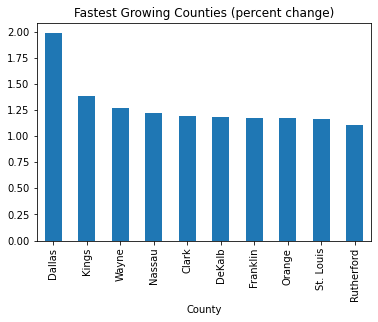

In [68]:
IandH.groupby('County')['pct_ch'].mean().nlargest(10).plot.bar(title='Fastest Growing Counties (percent change)');

Top 10 counties with the highest average percent change in total households between 2012 and 2019

In [69]:
cts = IandH.groupby('County')['pct_ch'].mean().nlargest(10).index.to_list()
bycounty = IandH.set_index('County').loc[cts]
bycounty.groupby('County')['Med_income'].mean().sort_values()

County
Wayne         46178.911111
Rutherford    48645.888889
DeKalb        50010.333333
Kings         52019.277778
Clark         54464.861111
Franklin      55730.458333
St. Louis     56115.111111
Orange        64412.577778
Dallas        66406.166667
Nassau        81810.111111
Name: Med_income, dtype: float64

almost all of the counties are below the national median household income ($62,843)

In [70]:
bycounty.State.unique()

array(['IA', 'TX', 'NY', 'CA', 'IN', 'MI', 'NC', 'OH', 'FL', 'NV', 'WA',
       'GA', 'IL', 'AL', 'MA', 'MO', 'PA', 'MN', 'TN'], dtype=object)

## Job openings

In [71]:
jobs = pd.read_csv('./data/modified_jos.csv').drop('Unnamed: 0', axis = 1)

In [72]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5202 entries, 0 to 5201
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      5100 non-null   object 
 1   Region                     5202 non-null   object 
 2   Job Openings               5202 non-null   int64  
 3   Hires                      5202 non-null   int64  
 4   Quits                      5202 non-null   int64  
 5   Layoffs & Discharges       5202 non-null   int64  
 6   Total Separations          5202 non-null   int64  
 7   Job Openings Rate          5202 non-null   float64
 8   Hires Rate                 5202 non-null   float64
 9   Quits Rate                 5202 non-null   float64
 10  Layoffs & Discharges Rate  5202 non-null   float64
 11  Total Separations Rate     5202 non-null   float64
 12  Year                       5202 non-null   int64  
 13  Month                      5202 non-null   int64

### States average job openings rate 

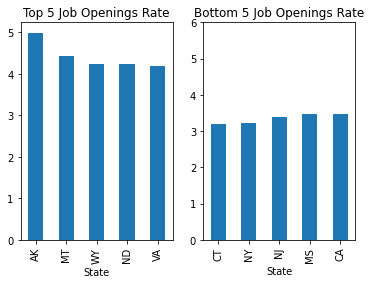

In [73]:
plt.subplot(1, 2, 1)
jobs.groupby('State')['Job Openings Rate'].mean().nlargest(5).plot.bar(title='Top 5 Job Openings Rate')
plt.subplot(1, 2, 2)
jobs.groupby('State')['Job Openings Rate'].mean().nsmallest(5).plot.bar(title='Bottom 5 Job Openings Rate')
plt.ylim((0,6))
plt.show();

- Top 5: Alaska, Montana, Wyoming, North Dakota, and Virginia
- Bottom 5: Connecticut, DC, New York, New Jersey, Mississipi 

### States average hire rate 

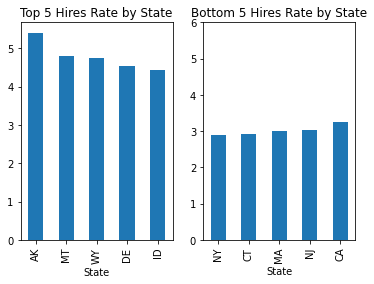

In [74]:
plt.subplot(1, 2, 1)
jobs.groupby('State')['Hires Rate'].mean().nlargest(5).plot.bar(title='Top 5 Hires Rate by State')
plt.subplot(1, 2, 2)
jobs.groupby('State')['Hires Rate'].mean().nsmallest(5).plot.bar(title='Bottom 5 Hires Rate by State')
plt.ylim((0,6))
plt.show();

In [4]:
jobs = pd.read_csv(r"..\newdata\cleandata\clean_jos.csv").drop('Unnamed: 0', axis=1)

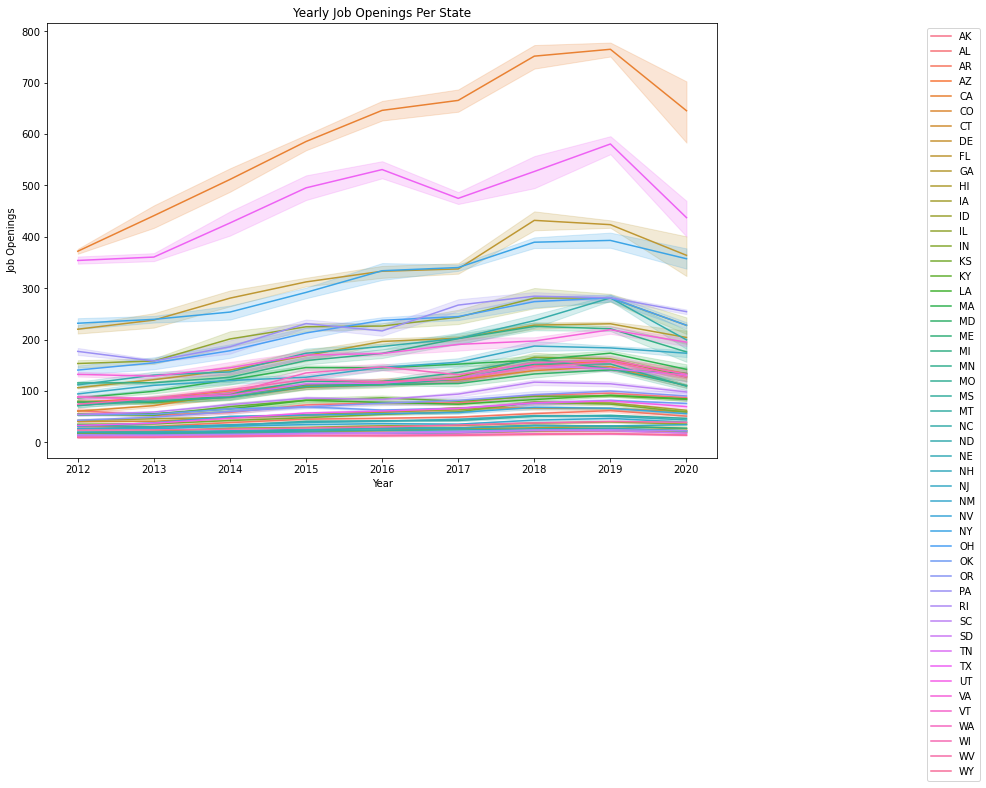

In [5]:
lp = sns.lineplot(data=jobs,x='Year',y='Job Openings',hue='State',legend='brief')
lp.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.title('Yearly Job Openings Per State')
plt.gcf().set_size_inches(12, 8)

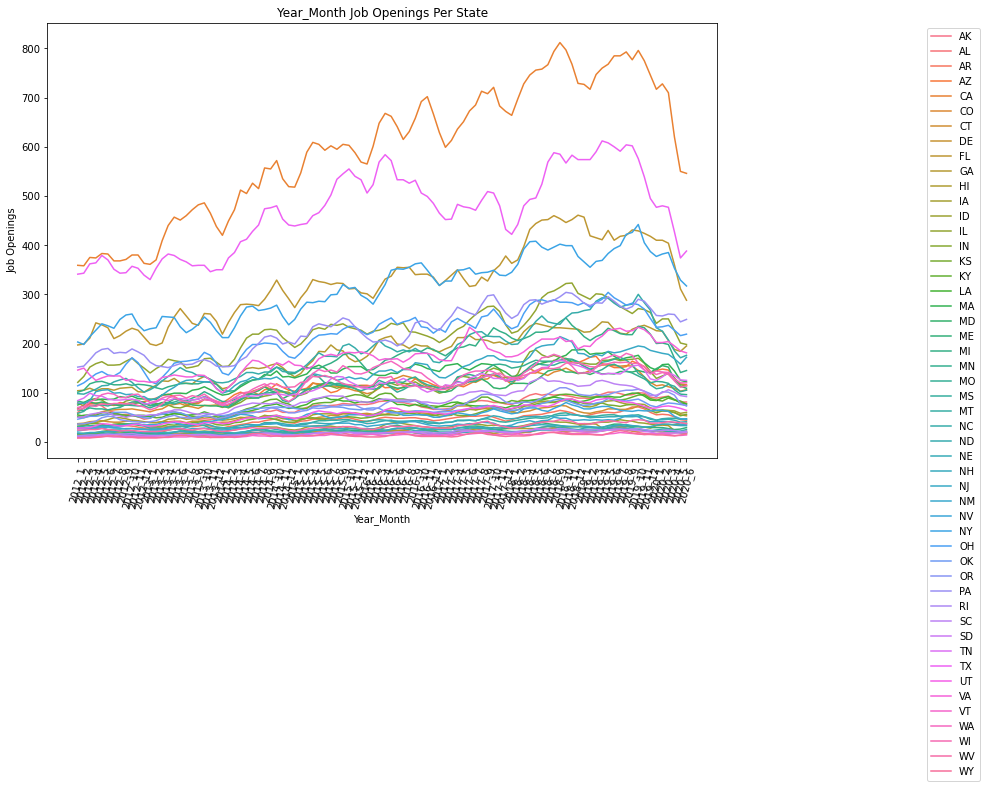

In [6]:
mm = sns.lineplot(data=jobs,x='Year_Month',y='Job Openings',hue='State')
mm.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.title('Year_Month Job Openings Per State')
plt.xticks(rotation=75)
plt.gcf().set_size_inches(12, 8)

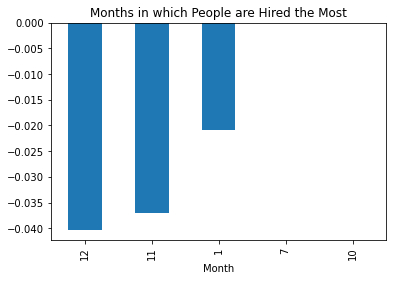

In [8]:
jobs['pct_change'] = jobs.groupby('State')['Job Openings'].pct_change()
jobs.groupby('Month')['pct_change'].median().nsmallest().plot(kind='bar', title='Months in which People are Hired the Most')
plt.show()

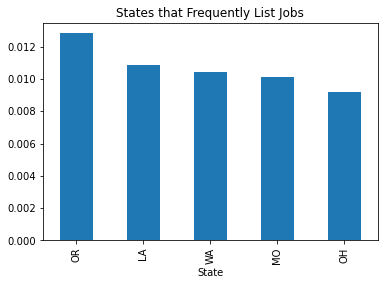

In [9]:
jobs.groupby('State')['pct_change'].median().nlargest().plot(kind='bar',title='States that Frequently List Jobs')
plt.show()

## Unemployment

In [75]:
unemployment = pd.read_csv('./data/cleandata/clean_unemployment.csv').drop('Unnamed: 0', axis = 1)

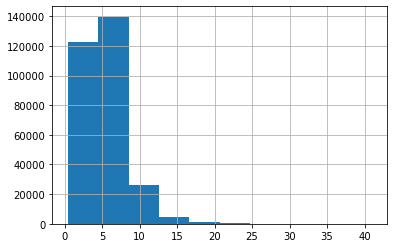

In [76]:
unemployment['Unemployment'].hist();

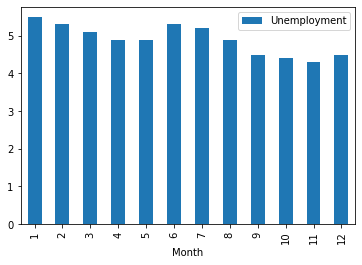

In [77]:
#visulize seasonal change in employment
unemployment.groupby('Month')[['Unemployment']].median().reset_index().plot(x='Month', y='Unemployment', kind='bar');

In [78]:
temp = pd.merge(zori, unemployment, on = ['County', 'State', 'Year_Month'])

In [79]:
temp

,ZipCode,County,State,ZORI,Year_x,Month_x,Year_Month,Unemployment,Year_y,Month_y
0,10025,New York,NY,3020.0,2014,2,2014_2,7.1,2014,2
1,10023,New York,NY,3145.0,2014,2,2014_2,7.1,2014,2
2,10002,New York,NY,2750.0,2014,2,2014_2,7.1,2014,2
3,10016,New York,NY,3138.0,2014,2,2014_2,7.1,2014,2
4,10029,New York,NY,2098.0,2014,2,2014_2,7.1,2014,2
...,...,...,...,...,...,...,...,...,...,...
253435,20186,Fauquier,VA,1543.0,2020,5,2020_5,6.9,2020,5
253436,20186,Fauquier,VA,1548.0,2020,6,2020_6,6.2,2020,6
253437,20186,Fauquier,VA,1552.0,2020,7,2020_7,5.7,2020,7
253438,20186,Fauquier,VA,1558.0,2020,8,2020_8,4.4,2020,8


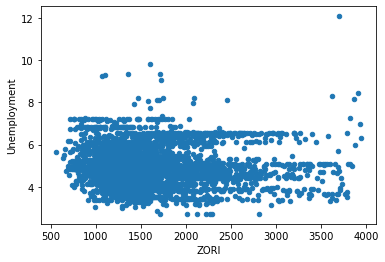

In [80]:
#no obvious correlation between unemployment and ZORI
temp[temp['ZORI']<4000].groupby('ZipCode')[['Unemployment', 'ZORI']].mean().reset_index().plot(x='ZORI', y='Unemployment', kind='scatter');

In [81]:
temp[temp['ZORI']<4000][['Unemployment','ZORI']].corr()

,Unemployment,ZORI
Unemployment,1.0000,-0.0218
ZORI,-0.0218,1.0000


## Units (units with construction permits application)

In [82]:
permits = pd.read_csv('./data/cleandata/clean_permits.csv').drop('Unnamed: 0', axis = 1)

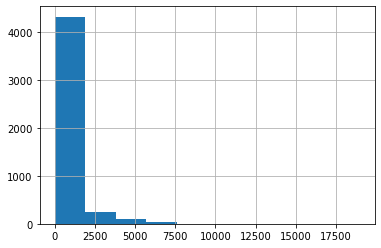

In [83]:
permits['Units'].hist();

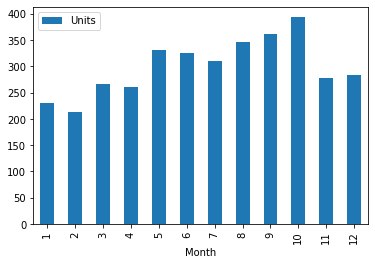

In [84]:
#visulize seasonal change in applications
permits.groupby('Month')[['Units']].median().reset_index().plot(x='Month', y='Units', kind='bar');

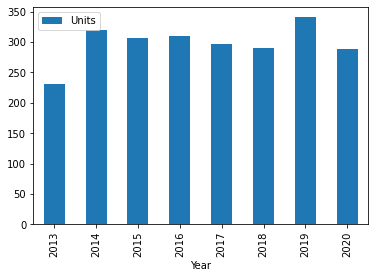

In [85]:
#change in applications by year
permits.groupby('Year')[['Units']].median().reset_index().plot(x='Year', y='Units', kind='bar');

In [86]:
temp = pd.merge(zori, permits, on = ['State', 'Year_Month'])

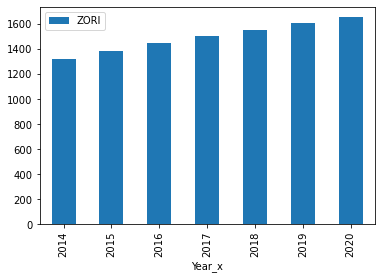

In [87]:
temp.groupby('Year_x')[['ZORI']].median().reset_index().plot(x='Year_x', y='ZORI', kind='bar');

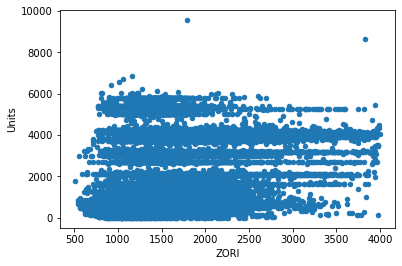

In [88]:
temp[temp['ZORI']<4000].groupby(['ZipCode','Year_x'])[['Units', 'ZORI']].mean().reset_index().plot(x='ZORI', y='Units', kind='scatter');

In [89]:
temp[temp['ZORI']<4000][['Units','ZORI']].corr()

,Units,ZORI
Units,1.000000,0.256679
ZORI,0.256679,1.000000


## Education

In [90]:
education = pd.read_csv('./data/cleandata/clean_education.csv').drop('Unnamed: 0', axis = 1)

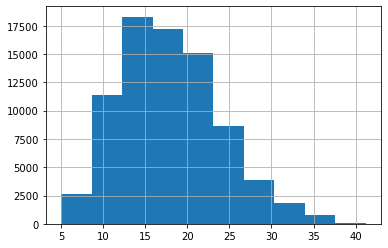

In [91]:
education['Percent Bachelors'].hist();

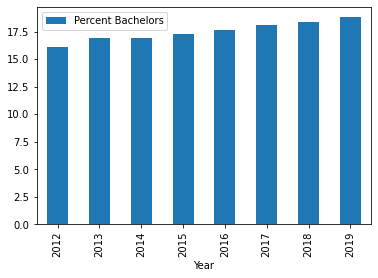

In [92]:
education.groupby('Year')[['Percent Bachelors']].median().reset_index().plot(x='Year', y='Percent Bachelors', kind='bar');

In [93]:
temp = pd.merge(zori, education, on = ['County', 'State', 'Year'])

In [94]:
temp[temp['ZORI']<4000][['Percent Bachelors','ZORI']].corr()

,Percent Bachelors,ZORI
Percent Bachelors,1.000000,0.347955
ZORI,0.347955,1.000000


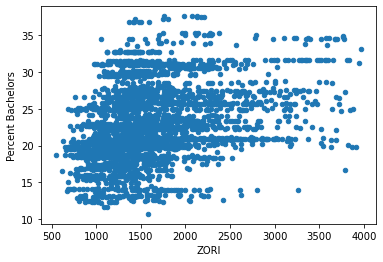

In [95]:
#no obvious correlation between unemployment and ZORI
temp[temp['ZORI']<4000].groupby('ZipCode')[['Percent Bachelors', 'ZORI']].mean().reset_index().plot(x='ZORI', y='Percent Bachelors', kind='scatter');

In [96]:
temp[temp['ZORI']<4000].groupby(['ZipCode','Year'])['ZORI'].mean().unstack('Year')

Year,2014,2015,2016,2017,2018,2019
ZipCode,,,,,,
1432,977.875000,1060.333333,1084.555556,1130.454545,1183.100000,1232.250000
1603,1171.888889,1170.111111,1285.000000,1292.000000,1362.250000,1412.111111
1604,1070.181818,1148.250000,1210.583333,1246.500000,1327.416667,1407.500000
1605,1044.625000,1112.416667,1182.833333,1244.833333,1342.583333,1433.416667
1609,985.714286,1025.333333,1082.250000,1161.700000,1254.166667,1316.500000
...,...,...,...,...,...,...
99204,636.800000,711.625000,760.000000,815.000000,904.000000,976.416667
99205,742.200000,753.750000,826.818182,917.583333,1026.272727,1084.416667
99206,859.125000,942.166667,1005.727273,1069.250000,1122.333333,1231.750000


---

### GRAPI

In [11]:
grapi=pd.read_csv('grapi.csv').drop('Unnamed: 0',axis=1)
grapi

,County,Year,Med_gr,state,Month,Year_Month,Med_income,GRAPI
0,"Blue Earth County,MN",2012,7511,MN,1,2012_1,49266.0,15.2
1,"Blue Earth County,MN",2012,7511,MN,2,2012_2,49266.0,15.2
2,"Blue Earth County,MN",2012,7511,MN,3,2012_3,49266.0,15.2
3,"Blue Earth County,MN",2012,7511,MN,4,2012_4,49266.0,15.2
4,"Blue Earth County,MN",2012,7511,MN,5,2012_5,49266.0,15.2
...,...,...,...,...,...,...,...,...
78823,"Natrona County,WY",2019,777,WY,8,2019_8,65034.0,1.2
78824,"Natrona County,WY",2019,777,WY,9,2019_9,65034.0,1.2
78825,"Natrona County,WY",2019,777,WY,10,2019_10,65034.0,1.2
78826,"Natrona County,WY",2019,777,WY,11,2019_11,65034.0,1.2


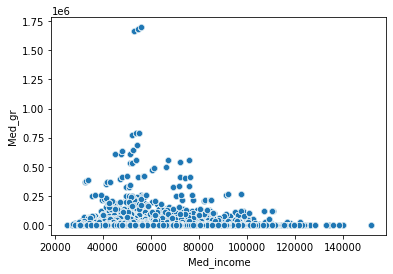

In [12]:
sns.scatterplot(data=grapi, x='Med_income',y='Med_gr')
plt.show()

<AxesSubplot:xlabel='County,Year'>

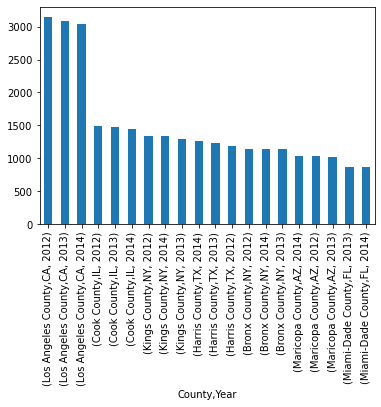

In [13]:
grapi.groupby(['County','Year'])['GRAPI'].median().nlargest(20).plot(kind='bar')

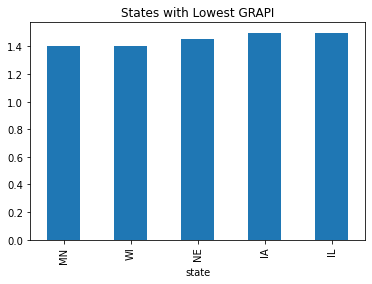

In [14]:
grapi.groupby('state')['GRAPI'].median().nsmallest().plot(kind='bar', title='States with Lowest GRAPI')
plt.show()


In [15]:
grapi['pct_change'] = grapi.groupby('County', as_index=False)['GRAPI'].pct_change()

<AxesSubplot:title={'center':'Counties with highest GRAPI yearly percent change'}, xlabel='County'>

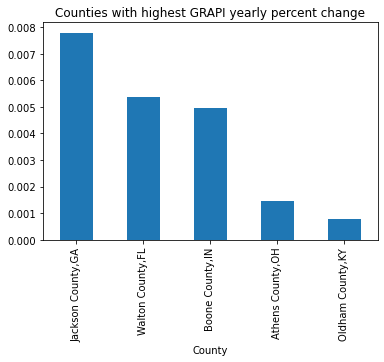

In [16]:
grapi.groupby('County')['pct_change'].mean().nlargest().plot(kind='bar',title='Counties with highest GRAPI yearly percent change')

---

## Rental Vacancy Rate

In [17]:
vac = pd.read_csv('vacancy.csv').drop('Unnamed: 0', axis=1)
vac = vac[vac.state != 'PR']
vac['Loc'] = vac['County'] + ', '+vac['state']
vac.drop('County', axis=1,inplace=True)

###   distribution

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


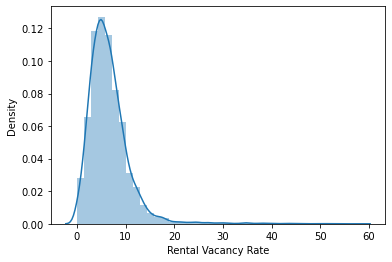

In [19]:
sns.distplot(vac['Rental Vacancy Rate'], bins=40)
plt.show()

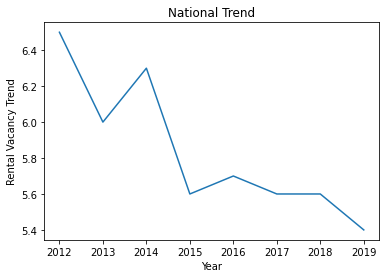

In [20]:
vac.groupby('Year')['Rental Vacancy Rate'].median().plot(kind='line', 
                                                         x='Year',y='Rental Vacancy Rate',
                                                         ylabel='Rental Vacancy Trend',title='National Trend')
plt.show()

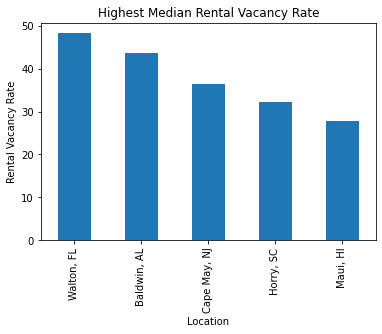

In [21]:
vac.groupby('Loc')['Rental Vacancy Rate'].median().nlargest().plot(kind='bar',
                                                                   xlabel='Location',
                                                                   ylabel='Rental Vacancy Rate',
                                                                   title='Highest Median Rental Vacancy Rate'
                                                                  )
plt.show()

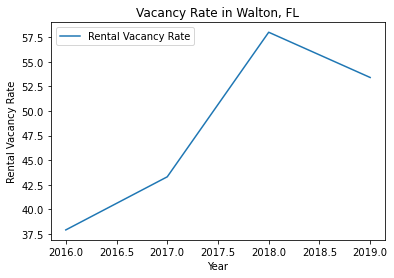

In [22]:
vac[vac.Loc == 'Walton, FL'].plot(kind='line',
                                  x='Year',
                                  y='Rental Vacancy Rate',
                                  xlabel='Year',
                                  ylabel='Rental Vacancy Rate',
                                  title='Vacancy Rate in Walton, FL'
                                 )
plt.show()

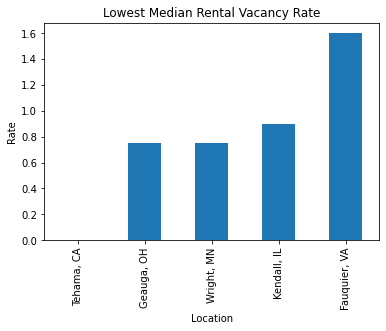

In [23]:
vac.groupby('Loc')['Rental Vacancy Rate'].median().nsmallest().plot(kind='bar', x='Loc',y='Rate',
                                                                    xlabel='Location',ylabel='Rate',
                                                                       title='Lowest Median Rental Vacancy Rate')
plt.show()

In [24]:
vac.groupby('Loc')['Rental Vacancy Rate'].median().nsmallest()

Loc
Tehama, CA      0.00
Geauga, OH      0.75
Wright, MN      0.75
Kendall, IL     0.90
Fauquier, VA    1.60
Name: Rental Vacancy Rate, dtype: float64

---

# Commute Time/Public vs Private Sector

In [25]:
ctc = pd.read_csv(r"C:\Users\Steven Lantigua\Downloads\cleandata\clean_commute_worker.csv").drop('Unnamed: 0',axis=1)
ctc['Location'] = ctc.County + ','+ ctc.State

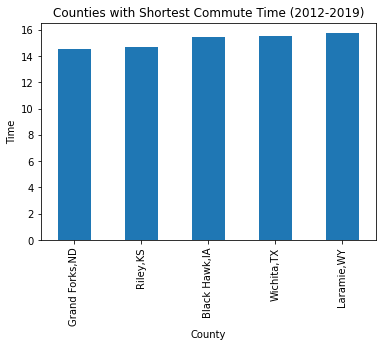

In [26]:
# nation
ctc.groupby('Location')['CommuteTime'].median().nsmallest().plot(kind='bar',
                                                                  xlabel ='County',
                                                                  ylabel='Time',
                                                                  title='Counties with Shortest Commute Time (2012-2019)')
plt.show()

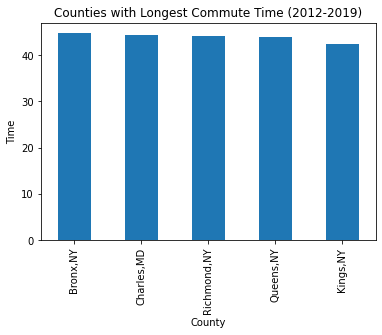

In [27]:
# nation
ctc.groupby('Location')['CommuteTime'].median().nlargest().plot(kind='bar',
                                                                  xlabel ='County',
                                                                  ylabel='Time',
                                                                  title='Counties with Longest Commute Time (2012-2019)')
plt.show()

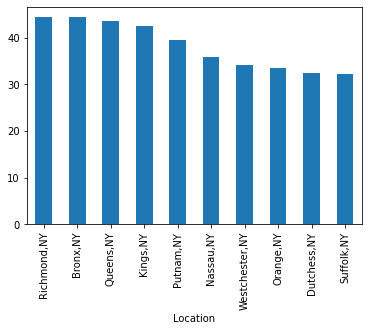

In [28]:
# Commute time in ny
ctc[ctc.State=='NY'].groupby('Location')['CommuteTime'].mean().nlargest(10).plot(kind='bar')
plt.show()

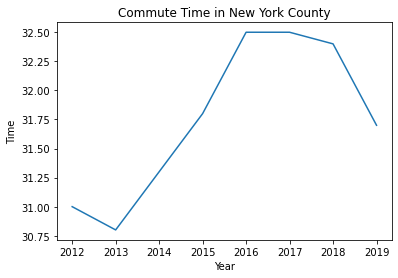

In [29]:
ctc[ctc.Location=='New York,NY'].groupby('Year')['CommuteTime'].mean().plot(kind='line',ylabel='Time',title='Commute Time in New York County')
plt.show()

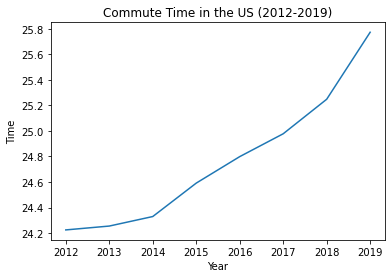

In [30]:
ctc.groupby('Year')['CommuteTime'].mean().plot(kind='line',ylabel='Time',title='Commute Time in the US (2012-2019)')
plt.show()

### Public vs Private Sector

In [31]:
print(f"The median percentage of private sector employees within a given county is {ctc['Salwrkr'].median()}%, and {ctc['Govwrkr'].median()}% for public sector workers")

The median percentage of private sector employees within a given county is 80.0%, and 13.8% for public sector workers


In [32]:
ctc.groupby('Location').agg({'Salwrkr':'median','Govwrkr':'median'}).nsmallest(5,'Salwrkr')

,Salwrkr,Govwrkr
Location,,
"Apache,AZ",48.95,46.30
"McKinley,NM",57.70,35.10
"Walker,TX",58.65,36.45
"Navajo,AZ",60.75,31.80
"Liberty,GA",62.50,33.20


In [33]:
ctc.groupby('Location').agg({'Salwrkr':'median','Govwrkr':'median'}).nlargest(5,'Salwrkr')

,Salwrkr,Govwrkr
Location,,
"Kosciusko,IN",88.20,6.65
"Bartholomew,IN",88.15,7.20
"Lehigh,PA",88.00,7.70
"Elkhart,IN",87.85,7.55
"Kent,MI",87.75,7.15


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


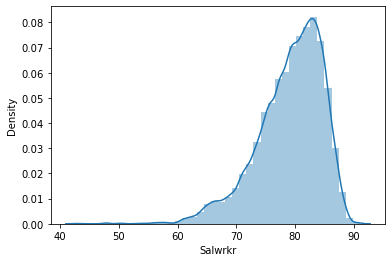

In [34]:
sns.distplot(ctc['Salwrkr'], bins=40)
plt.show()

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


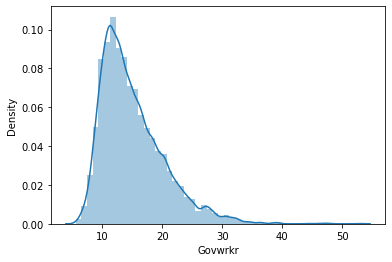

In [35]:
sns.distplot(ctc['Govwrkr'])
plt.show()

## Income Inequality

In [36]:
ineq = pd.read_csv('gini_ineq.csv')

### Gini Index
- The Gini Index is a summary measure of income inequality. The Gini coefficient incorporates the detailed shares data into a single statistic, which summarizes the dispersion of income across the entire income distribution. 

- The Gini coefficient ranges from 0, indicating perfect equality (where everyone receives an equal share), to 1, perfect inequality (where only one recipient or group of recipients receives all the income). 

- The Gini is based on the difference between the Lorenz curve (the observed cumulative income distribution) and the notion of a perfectly equal income distribution.

### Historically, counties with the highest level of income inequality

In [38]:
ineq.groupby(['County','Year'], as_index=False)['Gini_Index'].mean().nlargest(5,'Gini_Index')

,County,Year,Gini_Index
5392,"Putnam County,TN",2013,0.6286
4753,"New York County,NY",2013,0.6012
4755,"New York County,NY",2015,0.6011
4751,"New York County,NY",2011,0.5990
4752,"New York County,NY",2012,0.5962


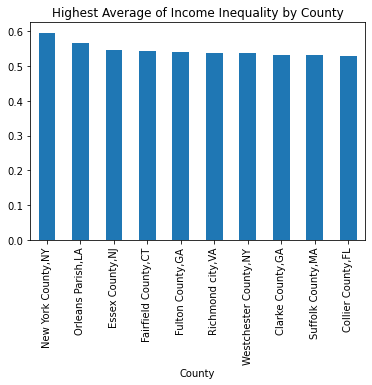

In [40]:
ineq.groupby('County')['Gini_Index'].mean().nlargest(10).plot(kind='bar', title='Highest Average of Income Inequality by County')
plt.show()

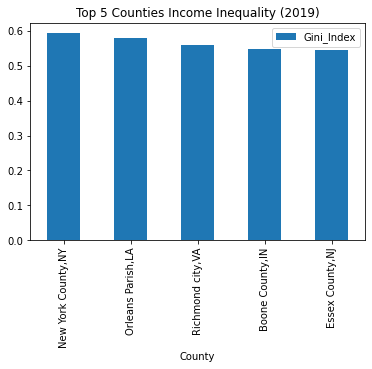

In [41]:
ineq.loc[ineq.Year_Month == '2019_12'].nlargest(5,'Gini_Index').plot(kind='bar',x='County',y='Gini_Index',title='Top 5 Counties Income Inequality (2019)')
plt.show()

### Most Prevalent Gini Index in the Nation

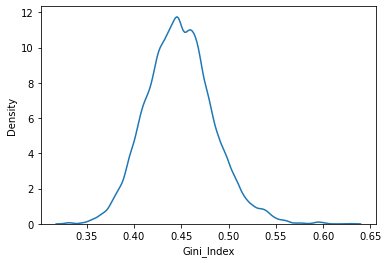

In [42]:
sns.kdeplot(ineq.Gini_Index)
plt.show()

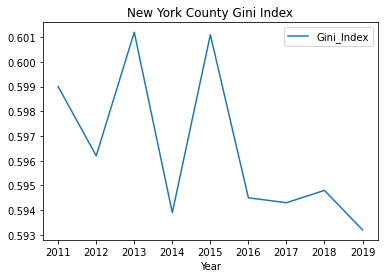

In [43]:
ineq[ineq.County == 'New York County,NY'].plot(kind='line',x='Year',y='Gini_Index', title='New York County Gini Index')
plt.show()

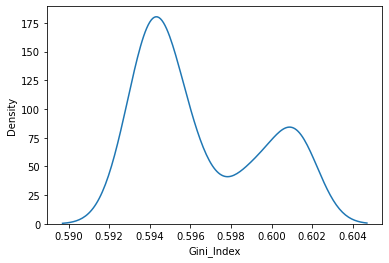

In [44]:
sns.kdeplot(ineq.query("County == 'New York County,NY'").Gini_Index)
plt.show()

In [45]:
ineq['pct_change'] = ineq.groupby('County', as_index=False)['Gini_Index'].pct_change()

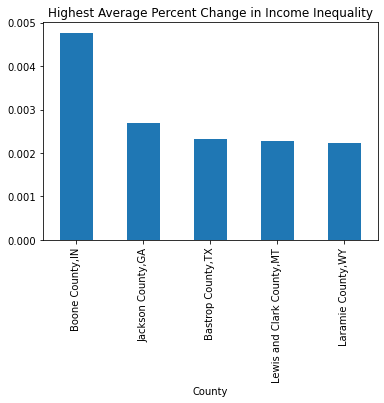

In [47]:
ineq.groupby('County')['pct_change'].mean().nlargest().plot(kind='bar',title='Highest Average Percent Change in Income Inequality')
plt.show()